In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
smmh_cleann = pd.read_csv('/content/drive/MyDrive/smmh_clean1.csv')
smmh_cleann.head()
df = pd.read_csv('/content/drive/MyDrive/smmh_clean1.csv')
print(df.columns)

Index(['Age', 'Gender', 'Relationship Status', 'Occupation Status',
       'Org. affiliations', 'Do you use social media?',
       'commonly used social media platforms',
       'Average time spent on S.M everyday',
       'How often do you aimlessly browse',
       'Distraction by S.M while busy doing something',
       'restlessness without S.M ', 'how easily distracted are you?',
       'how much are you bothered by worries?', 'difficulty concentrating',
       'rate of social comparison', 'how do you feel social comparisons',
       'rate of seeking online validation ', 'depression frequency ',
       'rate of fluctuation in interest in daily activities', 'insomnia rate'],
      dtype='object')


In [ ]:
df.describe()

,Age,How often do you aimlessly browse,Distraction by S.M while busy doing something,restlessness without S.M,how easily distracted are you?,how much are you bothered by worries?,difficulty concentrating,rate of social comparison,how do you feel social comparisons,rate of seeking online validation,depression frequency,rate of fluctuation in interest in daily activities,insomnia rate
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,25.921729,3.547672,3.328160,2.605322,3.354767,3.560976,3.237251,2.838137,2.767184,2.443459,3.252772,3.144124,3.199557
std,9.552164,1.091100,1.319455,1.239845,1.161644,1.272856,1.336342,1.407270,1.041958,1.237657,1.315872,1.246891,1.454525
min,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


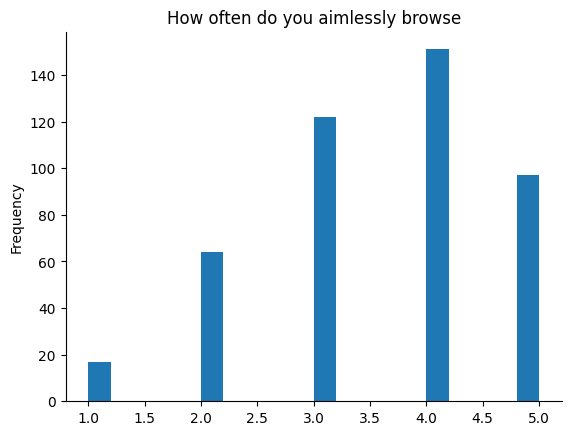

In [ ]:
df['How often do you aimlessly browse'].plot(kind='hist', bins=20, title='How often do you aimlessly browse')
plt.gca().spines[['top', 'right',]].set_visible(False)

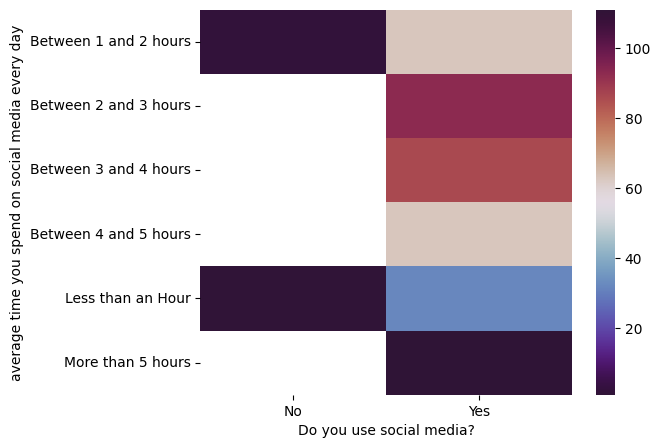

In [ ]:
plt.subplots(figsize=(6, 5))
df_2dhist = pd.DataFrame({
    x_label: grp['Average time spent on S.M everyday'].value_counts()
    for x_label, grp in df.groupby('Do you use social media?')
})
sns.heatmap(df_2dhist, cmap='twilight_shifted')
plt.xlabel('Do you use social media?')
_ = plt.ylabel('average time you spend on social media every day')

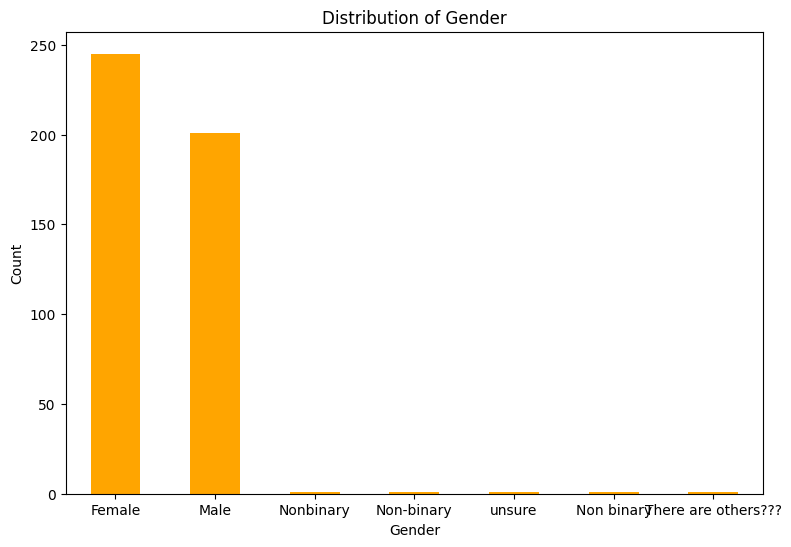

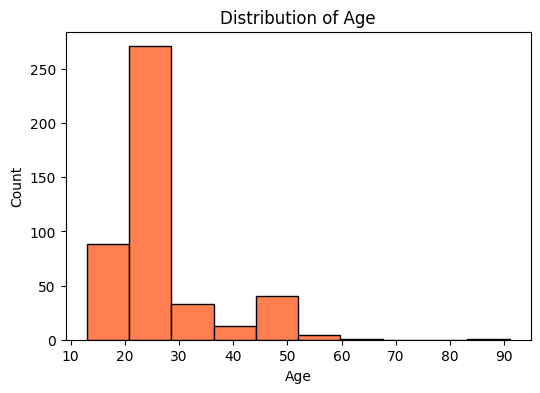

In [ ]:
# Filter out rows with missing gender information
df_filtered = df.dropna(subset=['Gender'])

# Count the number of occurrences of each gender
gender_counts = df_filtered['Gender'].value_counts()

# Plot the distribution of gender
plt.figure(figsize=(9, 6))
gender_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

# Plot the distribution of age
plt.figure(figsize=(6, 4))
plt.hist(df_filtered['Age'], bins=10, color='coral', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

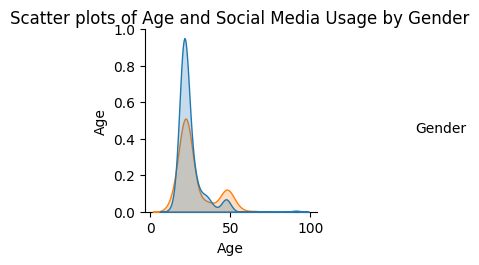

In [ ]:
# Converting gender to categorical data type for better visualization
df_filtered['Gender'] = df_filtered['Gender'].astype('category')

# Plotting relationships using scatter plots for Age and Social Media Usage
sns.pairplot(df_filtered[['Age', 'Average time spent on S.M everyday', 'Gender']], hue='Gender', diag_kind='kde')
plt.suptitle('Scatter plots of Age and Social Media Usage by Gender', y=1.02)
plt.show()

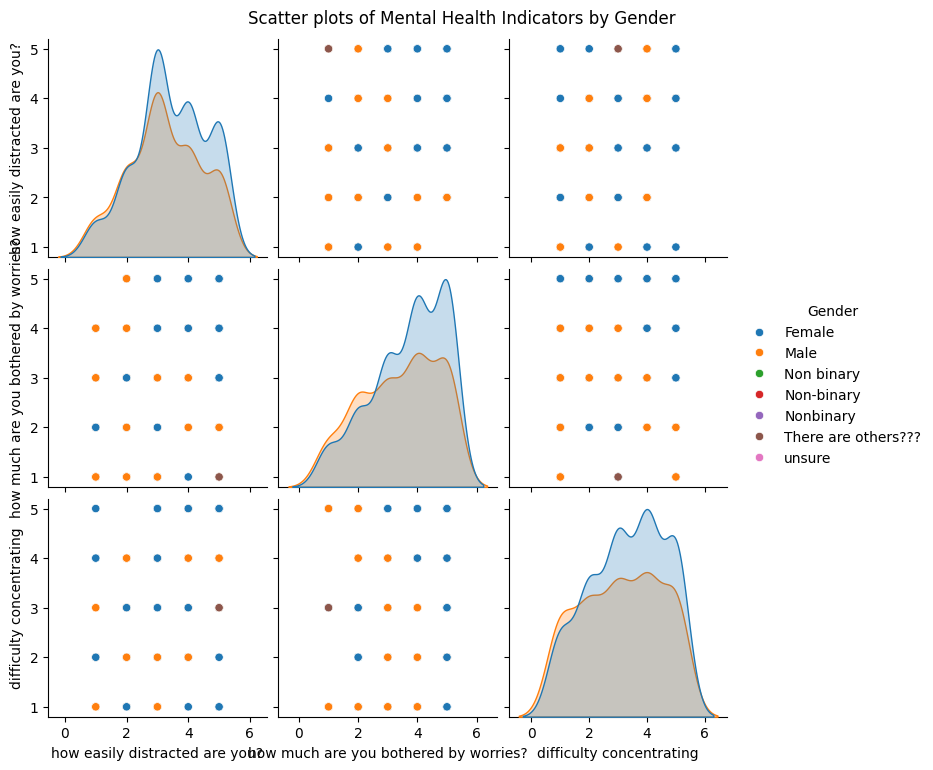

In [ ]:
#Plotting relationships using scatter plots for Mental Health Indicators
sns.pairplot(df_filtered[['how easily distracted are you?', 'how much are you bothered by worries?', 'difficulty concentrating', 'Gender']], hue='Gender', diag_kind='kde')
plt.suptitle('Scatter plots of Mental Health Indicators by Gender', y=1.02)
plt.show()

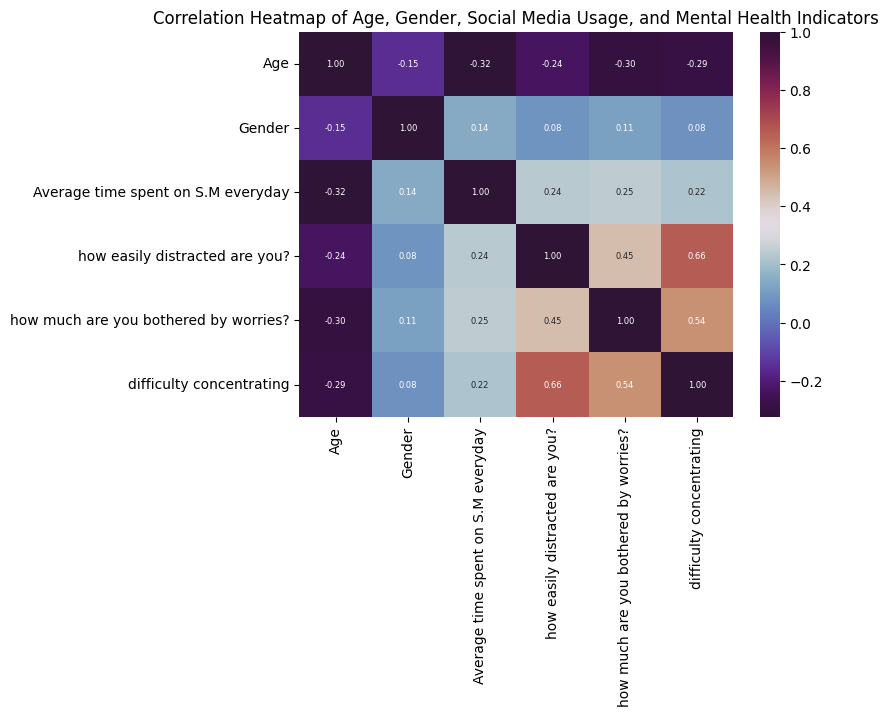

In [ ]:
# Select relevant columns for analysis
columns_of_interest = ['Age', 'Gender', 'Average time spent on S.M everyday',
                       'how easily distracted are you?',
                       'how much are you bothered by worries?',
                       'difficulty concentrating']

# Filter out rows with missing values in selected columns
df_filtered = df[columns_of_interest].dropna()

# Convert 'average time spent on social media' column to numeric values
df_filtered['Average time spent on S.M everyday'] = df_filtered['Average time spent on S.M everyday'].str.extract(r'(\d+)').astype(float)

# Convert gender to numeric values for correlation calculation
df_filtered['Gender'] = df_filtered['Gender'].map({'Male': 0, 'Female': 1})

# Calculate the correlation matrix
correlation_matrix = df_filtered.corr()

# Create a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='twilight_shifted', fmt=".2f", annot_kws={"size": 6})
plt.title('Correlation Heatmap of Age, Gender, Social Media Usage, and Mental Health Indicators')
plt.show()